In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport as pp
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 

In [105]:
df = pd.read_csv(r"superstore2.csv")
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [106]:
##adding a margins column
df["Margins"] = (df["Profit"]/df["Sales"])*100
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  Margins  
0      0.00   41.9136    16.00  
1      0.00  219.5820    30.00  
2      0.00    6.8714    47.00  
3      0.45 -383.0310   -40.00  
4      0.20    2.5164    11.25  

[5 rows x 22 columns]

First, I'll broadly analyze the data. 

In [107]:
df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit      Margins  
count  9994.000000  9994.000000  
mean     28.656896    12.031393  
std     234.260108    46.675435  
min   -6599.978000  -275.000000  
25%       1.728750     7.500000  
50%       8.666500    27.000000  
75%      29.364000    36.250000  
max    8399.976000    50.000000

In [22]:
pp(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [108]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  Margins  
0      0.00   41.9136    16.00  
1      0.00  219.5820    30.00  
2      0.00    6.8714    47.00  
3      0.45 -383.0310   -40.00  
4      0.20    2.5164    11.25  

[5 rows x 22 columns]

In [109]:
#checking for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Margins          0
dtype: int64

Now, I'll check for individual differences between groups within the data. 

<AxesSubplot:title={'center':'Total Sales by Segment'}, xlabel='Segment'>

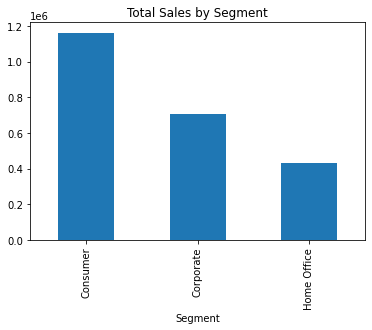

In [110]:
df.groupby('Segment')['Sales'].sum().plot.bar(title='Total Sales by Segment')

<AxesSubplot:title={'center':'Total Profit by Segment'}, xlabel='Segment'>

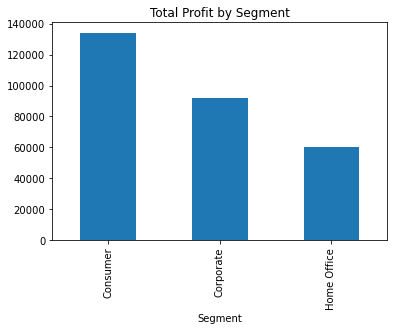

In [111]:
df.groupby('Segment')['Profit'].sum().plot.bar(title='Total Profit by Segment')

<AxesSubplot:title={'center':'Total Sales by Category'}, xlabel='Category'>

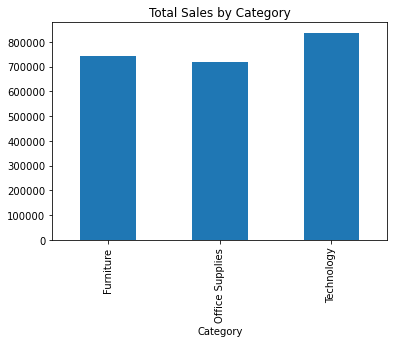

In [112]:
df.groupby('Category')['Sales'].sum().plot.bar(title='Total Sales by Category')

<AxesSubplot:title={'center':'Total Profit by Category'}, xlabel='Category'>

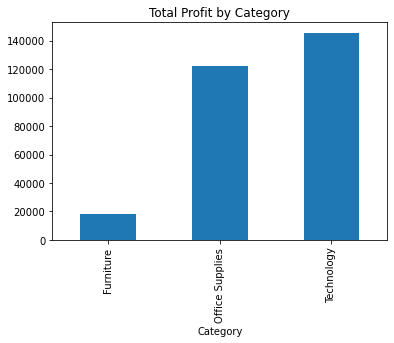

In [113]:
df.groupby('Category')['Profit'].sum().plot.bar(title='Total Profit by Category')

Note that furniture seems to have much worse profit margins than office supplies and technology.

<AxesSubplot:title={'center':'Total Sales by Sub-Category'}, xlabel='Sub-Category'>

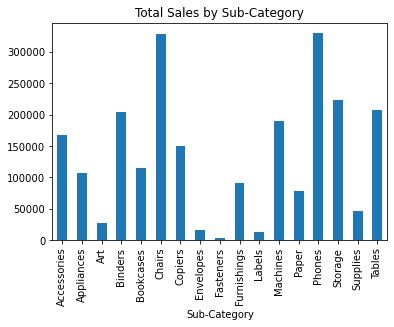

In [114]:
df.groupby('Sub-Category')['Sales'].sum().plot.bar(title='Total Sales by Sub-Category')


<AxesSubplot:title={'center':'Total Profit by Sub-Category'}, xlabel='Sub-Category'>

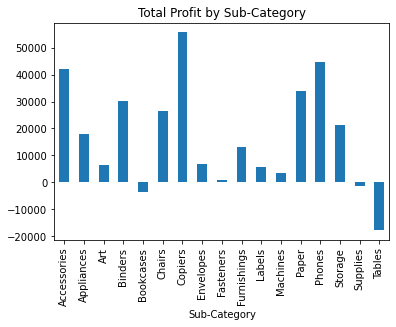

In [115]:
df.groupby('Sub-Category')['Profit'].sum().plot.bar(title='Total Profit by Sub-Category')

As shown in the above graphs, certain furniture items like tables and chairs have significantly lower profit-margins than other items. 

Analysis of location data:

<AxesSubplot:title={'center':'Total Purchases by Region'}, xlabel='Region'>

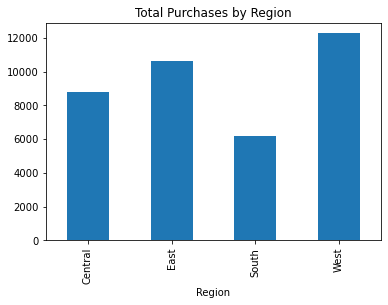

In [116]:
df.groupby('Region')['Quantity'].sum().plot.bar(title='Total Purchases by Region')

<AxesSubplot:title={'center':'Total Sales by Region'}, xlabel='Region'>

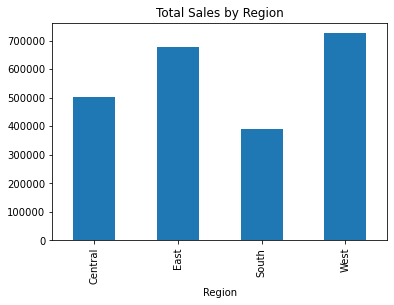

In [117]:
df.groupby('Region')['Sales'].sum().plot.bar(title='Total Sales by Region')

<AxesSubplot:title={'center':'Median Margins by Region'}, xlabel='Region'>

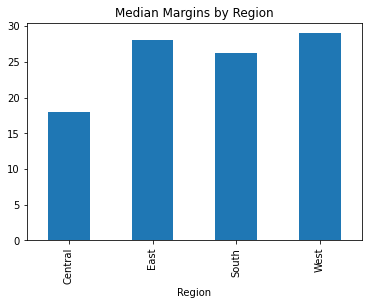

In [118]:
df.groupby('Region')['Margins'].median().plot.bar(title='Median Margins by Region')

In [119]:
##Converting order date to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Margins                 float64
dtype: object

In [120]:
df = df.sort_values(by="Order Date")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03   1/7/2014  Standard Class   
739      740  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
740      741  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
741      742  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
1759    1760  CA-2014-141817 2014-01-05  1/12/2014  Standard Class   

     Customer ID  Customer Name      Segment        Country          City  \
7980    DP-13000  Darren Powers     Consumer  United States       Houston   
739     PO-19195  Phillina Ober  Home Office  United States    Naperville   
740     PO-19195  Phillina Ober  Home Office  United States    Naperville   
741     PO-19195  Phillina Ober  Home Office  United States    Naperville   
1759    MB-18085     Mick Brown     Consumer  United States  Philadelphia   

      ...   Region       Product ID         Category Sub-Category  \
7980  ...  Central  OFF-PA-10000174  Office Supplies        Paper   
739   ...  Central  OFF-LA-10003223  Office Supplies       Labels   
740   ...  Central  OFF-ST-10002743  Office Supplies      Storage   
741   ...  Central  OFF-BI-10004094  Office Supplies      Binders   
1759  ...     East  OFF-AR-10003478  Office Supplies          Art   

                                           Product Name    Sales Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448        2   
739                                           Avery 508   11.784        3   
740                       SAFCO Boltless Steel Shelving  272.736        3   
741          GBC Standard Plastic Binding Systems Combs    3.540        2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536        3   

      Discount   Profit  Margins  
7980       0.2   5.5512    33.75  
739        0.2   4.2717    36.25  
740        0.2 -64.7748   -23.75  
741        0.8  -5.4870  -155.00  
1759       0.2   4.8840    25.00  

[5 rows x 22 columns]

In [121]:
df_byM = df.groupby(pd.Grouper(key='Order Date',freq='M')).sum()
df_byM.head()

Row ID  Postal Code      Sales  Quantity  Discount     Profit  \
Order Date                                                                  
2014-01-31  346176      4342297  14236.895       284     10.00  2450.1907   
2014-02-28  272235      3049775   4519.892       159      8.10   862.3084   
2014-03-31  871575      8314538  55691.009       585     26.30   498.7299   
2014-04-30  690625      7723827  28295.345       536     14.85  3488.8352   
2014-05-31  611708      6497804  23648.287       466     18.95  2738.7096   

                Margins  
Order Date               
2014-01-31  1015.797386  
2014-02-28   238.333333  
2014-03-31  2056.730159  
2014-04-30  3090.200980  
2014-05-31  1473.161765

<AxesSubplot:xlabel='Order Date'>

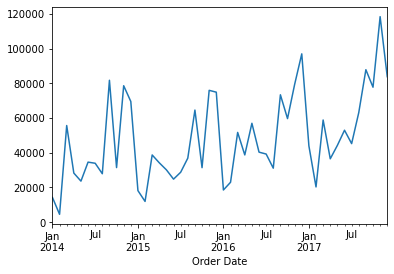

In [122]:
df_byM["Sales"].plot()

Sales moves in a somewhat predictable way each year, growing slowing across all four years. 

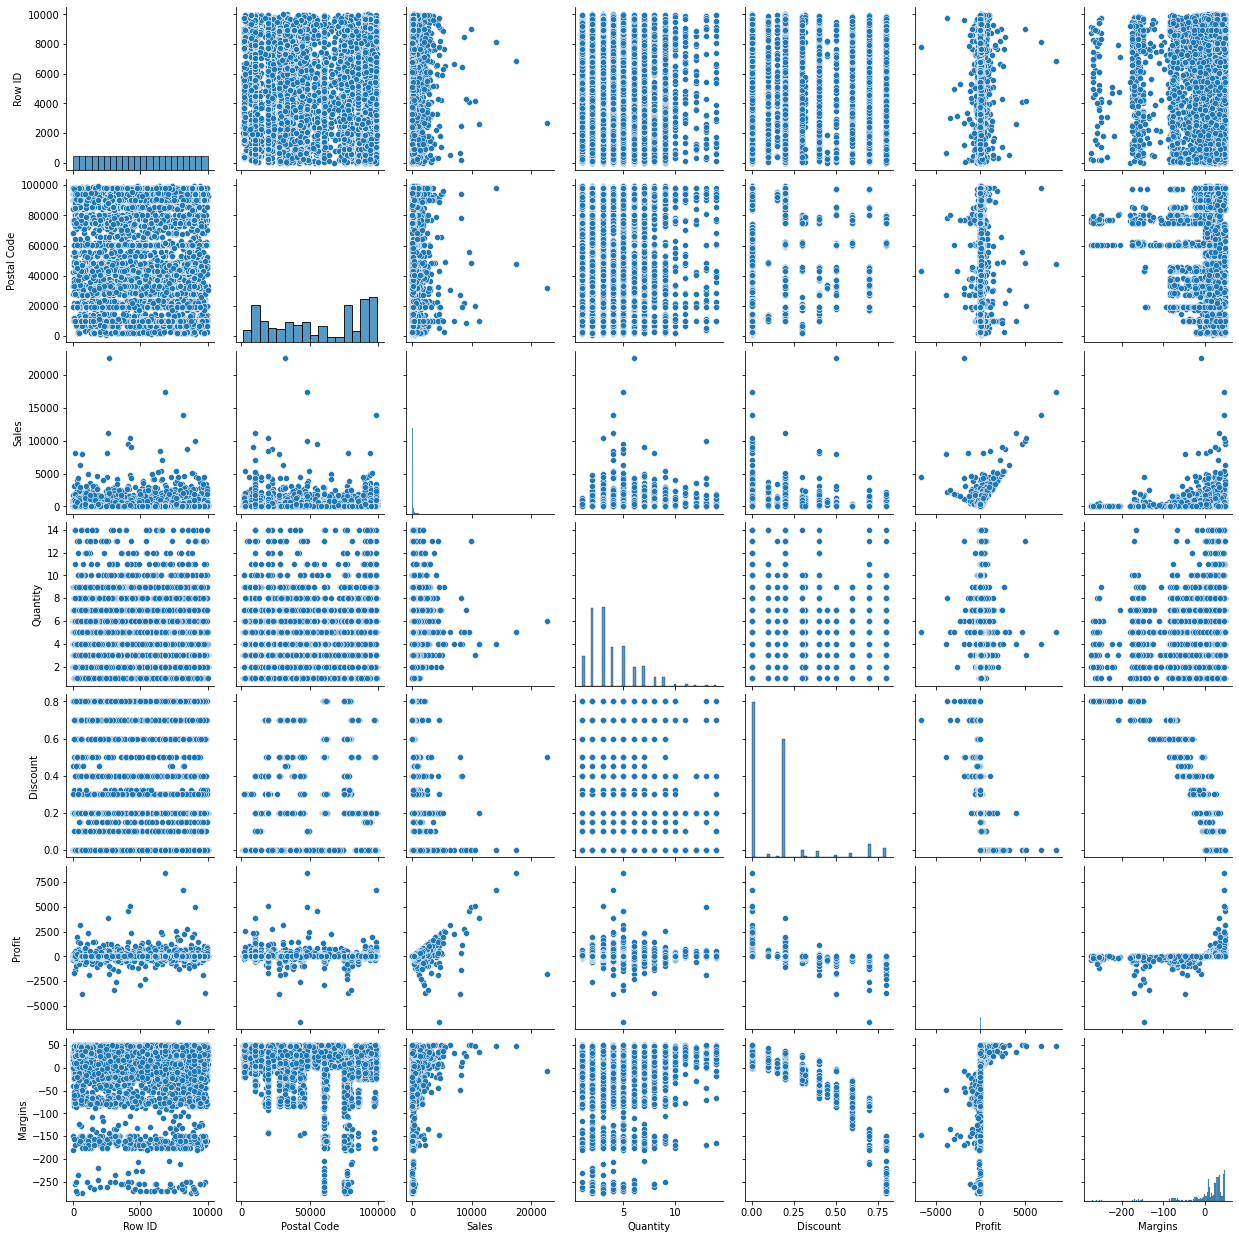

In [123]:
sns.pairplot(df)

The above plots help me understand if there exists any correlations between the numerically valued features. 

In [124]:
#dropping unecessary values
df.drop('Row ID',axis=1,inplace=True)
df.drop('Order ID',axis=1,inplace=True)

In [125]:
df.head()

Order Date  Ship Date       Ship Mode Customer ID  Customer Name  \
7980 2014-01-03   1/7/2014  Standard Class    DP-13000  Darren Powers   
739  2014-01-04   1/8/2014  Standard Class    PO-19195  Phillina Ober   
740  2014-01-04   1/8/2014  Standard Class    PO-19195  Phillina Ober   
741  2014-01-04   1/8/2014  Standard Class    PO-19195  Phillina Ober   
1759 2014-01-05  1/12/2014  Standard Class    MB-18085     Mick Brown   

          Segment        Country          City         State  Postal Code  \
7980     Consumer  United States       Houston         Texas        77095   
739   Home Office  United States    Naperville      Illinois        60540   
740   Home Office  United States    Naperville      Illinois        60540   
741   Home Office  United States    Naperville      Illinois        60540   
1759     Consumer  United States  Philadelphia  Pennsylvania        19143   

       Region       Product ID         Category Sub-Category  \
7980  Central  OFF-PA-10000174  Office Supplies        Paper   
739   Central  OFF-LA-10003223  Office Supplies       Labels   
740   Central  OFF-ST-10002743  Office Supplies      Storage   
741   Central  OFF-BI-10004094  Office Supplies      Binders   
1759     East  OFF-AR-10003478  Office Supplies          Art   

                                           Product Name    Sales  Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448         2   
739                                           Avery 508   11.784         3   
740                       SAFCO Boltless Steel Shelving  272.736         3   
741          GBC Standard Plastic Binding Systems Combs    3.540         2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536         3   

      Discount   Profit  Margins  
7980       0.2   5.5512    33.75  
739        0.2   4.2717    36.25  
740        0.2 -64.7748   -23.75  
741        0.8  -5.4870  -155.00  
1759       0.2   4.8840    25.00

In [126]:
display(df["Sales"].describe())
display(df["Profit"].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

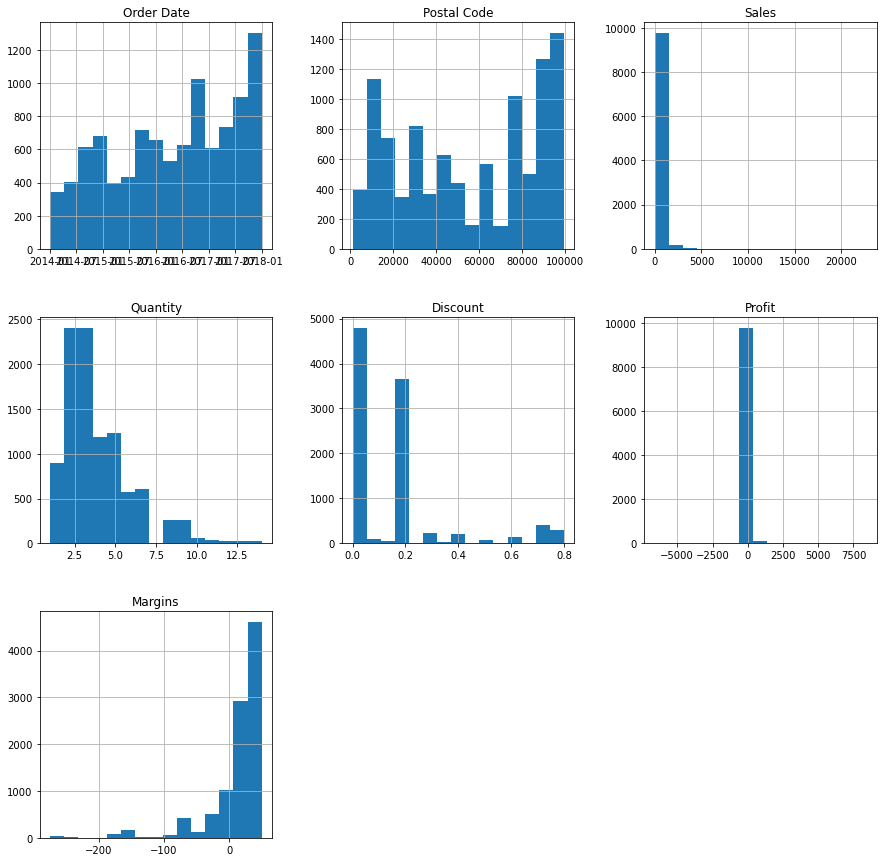

In [127]:
hist = df.hist(bins = 15, figsize = (15, 15), xlabelsize = 10)

In [128]:
df["Sales"].skew()

12.97275234181623

<AxesSubplot:xlabel='Sales'>

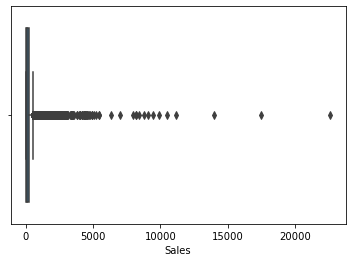

In [129]:
sns.boxplot(x=df["Sales"])

The data is skewed right, with outliers on the far right of the distribution. 

In [131]:
stdev = np.std(df["Sales"])
med = np.median(df["Sales"])
df['Sales'].values[df['Sales'] > stdev*3] = med

In [133]:
df["Sales"].skew()

2.8241603822608967

<AxesSubplot:xlabel='Sales'>

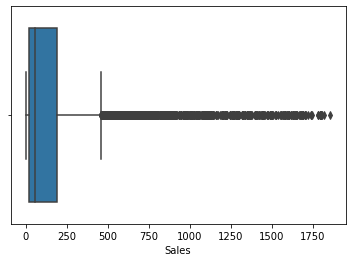

In [134]:
sns.boxplot(x=df["Sales"])

By removing outliers, the boxplot looks significantly better. 

Machine learning section:

In [155]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

Order Date  Ship Date       Ship Mode Customer ID  Customer Name  \
7980 2014-01-03 2014-01-07  Standard Class    DP-13000  Darren Powers   
739  2014-01-04 2014-01-08  Standard Class    PO-19195  Phillina Ober   
740  2014-01-04 2014-01-08  Standard Class    PO-19195  Phillina Ober   
741  2014-01-04 2014-01-08  Standard Class    PO-19195  Phillina Ober   
1759 2014-01-05 2014-01-12  Standard Class    MB-18085     Mick Brown   

          Segment        Country          City         State  Postal Code  \
7980     Consumer  United States       Houston         Texas        77095   
739   Home Office  United States    Naperville      Illinois        60540   
740   Home Office  United States    Naperville      Illinois        60540   
741   Home Office  United States    Naperville      Illinois        60540   
1759     Consumer  United States  Philadelphia  Pennsylvania        19143   

       Region       Product ID         Category Sub-Category  \
7980  Central  OFF-PA-10000174  Office Supplies        Paper   
739   Central  OFF-LA-10003223  Office Supplies       Labels   
740   Central  OFF-ST-10002743  Office Supplies      Storage   
741   Central  OFF-BI-10004094  Office Supplies      Binders   
1759     East  OFF-AR-10003478  Office Supplies          Art   

                                           Product Name    Sales  Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448         2   
739                                           Avery 508   11.784         3   
740                       SAFCO Boltless Steel Shelving  272.736         3   
741          GBC Standard Plastic Binding Systems Combs    3.540         2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536         3   

      Discount   Profit  Margins  
7980       0.2   5.5512    33.75  
739        0.2   4.2717    36.25  
740        0.2 -64.7748   -23.75  
741        0.8  -5.4870  -155.00  
1759       0.2   4.8840    25.00

In [157]:
df.drop('Product ID',axis=1,inplace=True)

KeyError: "['Product ID'] not found in axis"

In [161]:
dfmodel = df.copy()
dfmodel['Order Date'] = (dfmodel['Order Date'] - dfmodel['Order Date'].min())  / np.timedelta64(1,'D')

In [162]:
dfmodel['Ship Date'] = (dfmodel['Ship Date'] - dfmodel['Ship Date'].min())  / np.timedelta64(1,'D')
dfmodel.head()

Order Date  Ship Date       Ship Mode Customer ID  Customer Name  \
7980         0.0        0.0  Standard Class    DP-13000  Darren Powers   
739          1.0        1.0  Standard Class    PO-19195  Phillina Ober   
740          1.0        1.0  Standard Class    PO-19195  Phillina Ober   
741          1.0        1.0  Standard Class    PO-19195  Phillina Ober   
1759         2.0        5.0  Standard Class    MB-18085     Mick Brown   

          Segment        Country          City         State  Postal Code  \
7980     Consumer  United States       Houston         Texas        77095   
739   Home Office  United States    Naperville      Illinois        60540   
740   Home Office  United States    Naperville      Illinois        60540   
741   Home Office  United States    Naperville      Illinois        60540   
1759     Consumer  United States  Philadelphia  Pennsylvania        19143   

       Region         Category Sub-Category  \
7980  Central  Office Supplies        Paper   
739   Central  Office Supplies       Labels   
740   Central  Office Supplies      Storage   
741   Central  Office Supplies      Binders   
1759     East  Office Supplies          Art   

                                           Product Name    Sales  Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448         2   
739                                           Avery 508   11.784         3   
740                       SAFCO Boltless Steel Shelving  272.736         3   
741          GBC Standard Plastic Binding Systems Combs    3.540         2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536         3   

      Discount   Profit  Margins  
7980       0.2   5.5512    33.75  
739        0.2   4.2717    36.25  
740        0.2 -64.7748   -23.75  
741        0.8  -5.4870  -155.00  
1759       0.2   4.8840    25.00

In [164]:
dfmodel = pd.get_dummies(dfmodel,drop_first=True)
dfmodel.head()
x = dfmodel.drop('Sales',axis=1)
y = dfmodel["Sales"]
x = x.astype(float)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)

In [175]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [176]:
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
y_predicted = linearModel.predict(x_test)

print("Mean squared error: ")
print(mean_squared_error(y_test, y_predicted))
print("\n")
print("Mean Absolute Error: ")
print(mean_absolute_error(y_test, y_predicted))

Mean squared error: 
44104.30502700695


Mean Absolute Error: 
133.01703444975797


Trying other basic models. 

In [178]:
ridgeModel = Ridge()
ridgeModel.fit(x_train, y_train)
y_predicted_ridge = ridgeModel.predict(x_test)
print("Ridge MSE Error: ")
print(mean_squared_error(y_test, y_predicted_ridge))
print("\n")
print("Ridge MAE Error: ")
print(mean_absolute_error(y_test, y_predicted_ridge))

Ridge MSE Error: 
35502.737873824


Ridge MAE Error: 
116.83794983464767


In [184]:
from sklearn.model_selection import cross_val_score
score_reg = cross_val_score(ridgeModel, x_train, y_train, cv = 4)
print("Ridge Model Accuracy Score: ")
print("\n")
print(score_reg.mean()*100)


Ridge Model Accuracy: 


47.21620243747776


In [179]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(x_train, y_train)
rfr_y_predicted = rfr.predict(x_test)

In [187]:
rfr_mse = mean_squared_error(y_test,rfr_y_predicted)
rfr_mae= mean_absolute_error(y_test,rfr_y_predicted)
print("RFR MSE: ")
print(rfr_mse)
print("\n")
print("RFR MAE: ")
print(rfr_mae)


RFR MSE: 
8899.556369294072


RFR MAE: 
18.978899243121564


In [188]:
rfr_accuracy = cross_val_score(rfr, x_train, y_train, cv = 3)

RFR Accuracy Score: 


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [193]:
print("RFR Accuracy Score: ")
print(str(rfr_accuracy.mean()*100)+"%")

RFR Accuracy Score: 
87.76279554249015%
